In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

%config InlineBackend.figure_format = 'svg'
learning_rate = 0.01
epochs = 1000
n_samples = 3500
cost_history = np.empty(shape=[1],dtype=float)
INPUT_DIMENSIONS = 784


# HELPER FUNCTIONS

def get_batch(size, data, target): 
    index = np.arange(0, len(data))
    np.random.shuffle(index)
    index = index[:size]
    batch_data =  [data[ i] for i in index]
    batch_target = [target[ i] for i in index]
    return np.asarray(batch_data), np.asarray(batch_target)

def shuffle(data, target):
    index = np.arange(0, len(data))
    np.random.shuffle(index)
    shuffled_data = [data[i] for i in index]
    shuffled_target = [target[i] for i in index]
    return np.asarray(shuffled_data), np.asarray(shuffled_target)

[0.0, 0.98]
[0.98]
[0.0, 0.95]
[0.95]
[0.0, 0.95]
[0.95]


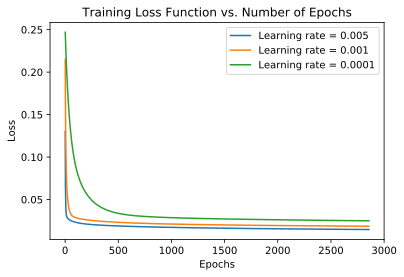

Converged Loss Value: 
0.005 learning rate:  0.014707737
0.001 learning rate:  0.018550746
0.0001 learning rate:  0.024971532
[0.0, 0.98]
[0.98]
[0.0, 0.98]
[0.98]
[0.98, 0.98]
[0.98]
Time to train and predict: 
Batch size of 500:  70.81368494033813
Batch size of 1500:  195.80502104759216
Batch size of 3500:  483.05157923698425
------
Final MSE: 
Batch size of 500:  0.014707737
Batch size of 1500:  0.013078814
Batch size of 3500:  0.011968471
[0.0, 0.98]
[0.98]
[0.0, 0.98]
[0.98]
[0.0, 0.97]
[0.97]
[0.0, 0.97]
[0.97]
-------
Validation Accuracies for different weight decay values: 
0.0 :  [0.98]
0.001 :  [0.98]
0.1 :  [0.97]
1 :  [0.97]
[0.9655172, 0.9655172]
[0.9655172]
Test set Accuracy:  [0.9655172]


In [2]:
def train_and_run_linear_reg(num_epochs, batch_size, p_learning_rate, decay_coefficient, test_set):
    epochs = num_epochs
    BATCH_SIZE = batch_size 
    learning_rate = p_learning_rate
    beta = decay_coefficient
    
    with np.load("notMNIST.npz") as data :
        Data, Target = data ["images"], data["labels"]
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
#         beta = 0.0001


        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]

        trainData_Flat, trainTarget_Flat = trainData.reshape(trainData.shape[0],-1), trainTarget
        validData_Flat, validTarget_Flat = validData.reshape(validData.shape[0],-1), validTarget
        testData_Flat, testTarget_Flat = testData.reshape(testData.shape[0],-1), testTarget

        X = tf.placeholder(tf.float32, [None, 784] )
        X_pred = tf.placeholder(tf.float32, [None, 784] )
        Y = tf.placeholder(tf.float32, [None, 1])
        W = tf.Variable(tf.zeros([784, 1]))
        B = tf.Variable(tf.zeros([1]))
        regularizer = tf.nn.l2_loss(W)


        pred = tf.add(tf.matmul(X,W), B)
        valid_prediction = tf.round(tf.add(tf.matmul(X,W), B))
#         valid_prediction = tf.round(tf.nn.sigmoid(tf.add(tf.matmul(X,W), B)))


        cost = tf.reduce_sum(((tf.pow(pred-Y, 2))/(2*n_samples)))+(beta*regularizer)
    #     cost = tf.reduce_mean(cost + beta * regularizer)

        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        init = tf.global_variables_initializer()

        saver = tf.train.Saver()


        with tf.Session() as sess: 

            def calc(x, y):
                predictions = tf.round(tf.nn.sigmoid(tf.add(tf.matmul(x,W), B)))
                error = tf.reduce_mean(tf.square(y - predictions))
                return [predictions, error]

            sess.run(init)


            train_count = len(trainData_Flat)    
            cost_list = []
            
            for i in range(1, epochs + 1):
                cost_final = np.empty(shape=[1],dtype=float)
                for start, end in zip(range(0, train_count, BATCH_SIZE),
                                      range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
                    sess.run(optimizer, feed_dict={X: trainData_Flat[start:end],
                                               Y: trainTarget_Flat[start:end]})
                    


                trainData_Flat, trainTarget_Flat = shuffle(trainData_Flat, trainTarget_Flat)
                
                cost_list.append(sess.run(cost, feed_dict={X:trainData_Flat, Y:trainTarget_Flat}))

            if (test_set):
                predictions = sess.run(valid_prediction, feed_dict={X: testData_Flat})
                acc, acc_op = tf.metrics.accuracy(labels=testTarget_Flat, 
                                      predictions=predictions)
            else: 
                
                predictions = sess.run(valid_prediction, feed_dict={X: validData_Flat})
                acc, acc_op = tf.metrics.accuracy(labels=validTarget_Flat, 
                                       predictions=predictions)
                
            

            init_l = tf.local_variables_initializer()
            sess.run(init_l)

            print(sess.run([acc, acc_op]))
            print(sess.run([acc]))
            
            
            # Output
            #[0.0, 0.66666669]
            #[0.66666669]

#             save_path = saver.save(sess, "./linear_reg_model.ckpt")
#             print("Model saved in path: %s" % save_path)
            return cost_list, sess.run([acc]) 


def q1a(): 
    learning_rate_1, _ = train_and_run_linear_reg(2857,500,0.005,0, False)
    learning_rate_2, _ = train_and_run_linear_reg(2857,500,0.001,0, False)
    learning_rate_3, _ = train_and_run_linear_reg(2857,500,0.0001,0, False)
    
    epochs = list(range(1,2858))
    
    plt.plot(epochs, learning_rate_1, label="Learning rate = 0.005")
    plt.plot(epochs, learning_rate_2, label="Learning rate = 0.001")
    plt.plot(epochs, learning_rate_3, label="Learning rate = 0.0001")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training Loss Function vs. Number of Epochs")
    plt.legend()
    plt.show()
    
    print("Converged Loss Value: ")
    print("0.005 learning rate: ", learning_rate_1[-1])
    print("0.001 learning rate: ", learning_rate_2[-1])
    print("0.0001 learning rate: ", learning_rate_3[-1])
    
def q1b():
    import time
    
    start = time.time()
    batch_size_1, _ = train_and_run_linear_reg(2857,500,0.005,0, False)
    end = time.time()
    batch_time_1 = (end-start)
    
    
    start = time.time()
    batch_size_2, _ = train_and_run_linear_reg(8571,1500,0.005,0, False)
    end = time.time()
    batch_time_2 = (end-start)
    
    start = time.time()
    batch_size_3, _ = train_and_run_linear_reg(20000,3500,0.005,0, False)
    end = time.time()
    batch_time_3 = (end-start)
    
    print("Time to train and predict: ")
    print("Batch size of 500: ", batch_time_1)
    print("Batch size of 1500: ", batch_time_2)
    print("Batch size of 3500: ", batch_time_3)
    
    print ("------")
    
    print("Final MSE: ")
    print("Batch size of 500: ", batch_size_1[-1])
    print("Batch size of 1500: ", batch_size_2[-1])
    print("Batch size of 3500: ", batch_size_3[-1])
    
def q1c_partA():
    
    weight_decay = [0.0,0.001,0.1,1]
    
    _, accuracy_weight_decay_0 = train_and_run_linear_reg(2857,500,0.005, weight_decay[0], False)
    
    _, accuracy_weight_decay_1 = train_and_run_linear_reg(2857,500,0.005, weight_decay[1], False)
    
    _, accuracy_weight_decay_2 = train_and_run_linear_reg(2857,500,0.005, weight_decay[2], False)
    
    _, accuracy_weight_decay_3 = train_and_run_linear_reg(2857,500,0.005, weight_decay[3], False)
    
    print ("-------")
    
    print("Validation Accuracies for different weight decay values: ")
    print(weight_decay[0], ": ", accuracy_weight_decay_0 )
    print(weight_decay[1], ": ", accuracy_weight_decay_1 )
    print(weight_decay[2], ": ", accuracy_weight_decay_2 )
    print(weight_decay[3], ": ", accuracy_weight_decay_3 )
    
    
def q1c_partB():
    _, accuracy = train_and_run_linear_reg(2857,500,0.005, 0, True)
    print("Test set Accuracy: ", accuracy)
    

q1a()
q1b()
q1c_partA()
q1c_partB()

# train_and_run_linear_reg(2857,500,0.005,0)

In [90]:
def calculate_accuracy(predictions, target):
    if (not(isinstance(predictions, np.ndarray)) or not(isinstance(target, np.ndarray))):
        raise TypeError ("Input to function is not numpy.ndarray")
        
    if (len(predictions) != len(target)):
        raise ValueError("Prediction and Target shapes are not equal")
#     print (target)
#     predictions = np.ndarray.tolist(predictions)
#     target = np.ndarray.tolist(target)
    
#     print (predictions)
#     print (len(target))
    
    
    counter = 0

    for i,_ in np.ndenumerate(target):
        if (target[i] == predictions[i]):
            counter=counter+1
       
           
    return (counter/len(predictions))


def closed_form_linear_regression():
    import time
    with np.load("notMNIST.npz") as data :
        Data, Target = data ["images"], data["labels"]
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
#         beta = 0.0001


        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]

        trainData_Flat, trainTarget_Flat = trainData.reshape(trainData.shape[0],-1), trainTarget
        trainData_Flat_withBias = np.hstack([np.ones((len(trainData_Flat), 1)), trainData_Flat])
        
        validData_Flat, validTarget_Flat = validData.reshape(validData.shape[0],-1), validTarget
        validData_Flat_withBias = np.hstack([np.ones((len(validData_Flat), 1)), validData_Flat])
        
        testData_Flat, testTarget_Flat = testData.reshape(testData.shape[0],-1), testTarget
        testData_Flat_withBias = np.hstack([np.ones((len(testData_Flat), 1)), testData_Flat])        
        
        
        X = tf.placeholder(tf.float32, [None, INPUT_DIMENSIONS+1] )
        Y = tf.placeholder(tf.float32, [None, 1])
        pred = tf.placeholder(tf.float32, [None, 1])
#         mse = lambda pred, lab: ((pred-np.array(lab))**2).sum()/DS_SIZE
        
        mse = tf.reduce_sum(((tf.pow(pred-Y, 2))/(2*n_samples)))
        
        weights_optimizer = tf.matrix_solve_ls(X, Y, 0, fast=True)
#         cost = tf.reduce_sum(((tf.pow(pred-Y, 2))/(2*n_samples))+(beta*regularizer))
        
        with tf.Session() as s:
            tf.initialize_all_variables().run()
            start = time.time()
            params = s.run(weights_optimizer, feed_dict={X:trainData_Flat_withBias, Y:trainTarget_Flat})
            end = time.time()

            print ("Time to train: ", end-start)
            weights = params
#             print("Solution for parameters:\n",type(PARAMETERS_NORMEQ))
            
            lambda_predictions = lambda x: np.absolute(np.round(weights.T.dot(x)))
        
            train_predictions = np.array([lambda_predictions(x) for x in trainData_Flat_withBias])
            print("MSE: ", s.run(mse, feed_dict={pred:train_predictions, Y:trainTarget_Flat}))
            
            
            
            predictions_validation = np.array([lambda_predictions(x) for x in validData_Flat_withBias])
            print("Validation accuracy: ", calculate_accuracy(predictions_validation, validTarget_Flat))
            
            predictions_test = np.array([lambda_predictions(x) for x in testData_Flat_withBias])

            print("Test accuracy: ", calculate_accuracy(predictions_test, testTarget))
            
 
                
            
           
        
        
closed_form_linear_regression()        

    

Time to train:  0.08899402618408203
MSE:  0.0032857144
Validation accuracy:  0.97
Test accuracy:  0.9586206896551724


In [161]:
#QUESTION 2.2.1 SOFTMAX MULTICLASS LOGISTIC REGRESSION 

from sklearn import preprocessing

DIMENSIONS = 784
CLASSES = 10
BETA = 0.01
LEARNING_RATE = 0.01
BATCH_SIZE = 500
epochs = 1000

le = preprocessing.LabelEncoder() 
lb = preprocessing.LabelBinarizer()

def tune_learning_parameters(learning_rate=0, test_case=False):
    LEARNING_RATE=learning_rate

    with np.load("notMNIST.npz") as data:
        sess = tf.Session()
        seed = 2
        Data, Target = data ["images"], data["labels"]
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx]/255.
        Target = Target[randIndx]
        trainData, trainTarget = Data[:15000], Target[:15000]
        validData, validTarget = Data[15000:16000], Target[15000:16000]
        testData, testTarget = Data[16000:], Target[16000:]


        trainData_Flat, trainTarget_Flat = trainData.reshape(trainData.shape[0],-1), trainTarget
        le.fit(trainTarget_Flat)
        trainTarget_Encoded = le.transform(trainTarget_Flat)


        lb.fit(trainTarget_Encoded)
        trainTarget_Encoded_Flat = lb.transform(trainTarget_Encoded)

        print(trainTarget)
        print("----")
        print(trainTarget_Encoded_Flat)


        # VALIDATION AND TEST DATA SET PREP
        
        validData_Flat, validTarget_Flat = validData.reshape(validData.shape[0],-1), validTarget
        le.fit(validTarget_Flat)
        validTarget_Encoded = le.transform(validTarget_Flat)

        lb.fit(validTarget_Encoded)
        validTarget_Encoded_Flat = lb.transform(validTarget_Encoded)


        testData_Flat, testTarget_Flat = testData.reshape(testData.shape[0],-1), testTarget
        le.fit(testTarget_Flat)
        testTarget_Encoded = le.transform(testTarget_Flat)
        
        lb.fit(testTarget_Encoded)
        testTarget_Encoded_Flat = lb.transform(testTarget_Encoded)
        
        

        x = tf.placeholder(tf.float32, [None, DIMENSIONS])
        y_ = tf.placeholder(tf.float32, [None, CLASSES])
        W = tf.Variable(tf.zeros([DIMENSIONS, CLASSES]))
        b = tf.Variable(tf.zeros([CLASSES]))

        Y = tf.matmul(x, W) + b

        prediction = tf.nn.softmax(Y) 


        cross_entropy_loss = tf.nn.softmax_cross_entropy_with_logits(logits=Y, labels=y_)
        loss_weight_decay=tf.nn.l2_loss(W)
        total_loss = tf.reduce_mean((cross_entropy_loss) + (BETA*loss_weight_decay))

        optimizer_GD = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(total_loss)
        optimizer_ADAM = tf.train.AdamOptimizer(LEARNING_RATE).minimize(total_loss)

    
    
        init = tf.global_variables_initializer()
        
        def accuracy(predictions, labels): 
                    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
                    accu = (correctly_predicted) / predictions.shape[0] 
                    return accu 


        with tf.Session() as sess: 



                sess.run(init)

                train_count = len(trainData_Flat)    
                cost_list = []

                for i in range(1, epochs + 1):

                    for start, end in zip(range(0, train_count, BATCH_SIZE),
                                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):

                        sess.run(optimizer_ADAM, feed_dict={x: trainData_Flat[start:end],
                                                   y_: trainTarget_Encoded_Flat[start:end]})



    #                 trainData_Flat, trainTarget_Flat = shuffle(trainData_Flat, trainTarget_Encoded_Flat)

                    cost_list.append(sess.run(total_loss, feed_dict={x:trainData_Flat, y_:trainTarget_Encoded_Flat}))

                if (test_case):
                    predictions = sess.run(prediction, feed_dict={x: testData_Flat})
                    acc = accuracy(predictions, testTarget_Encoded_Flat)
                else:
                    predictions = sess.run(prediction, feed_dict={x: validData_Flat})
                    acc = accuracy(predictions, validTarget_Encoded_Flat)

                                

    # utility function to calculate accuracy 

                
                 
                print ("Learning Rate: ", LEARNING_RATE, "| ", acc)
                return acc

#TUNING LEARNING RATE 
            
# learning_rate = 0.000001
# learning_rate_history = []
# accuracy_history = []
# multiplier = 1.2
# for i in range(30):
#     learning_rate_history.append(learning_rate)
#     acc = tune_learning_parameters(learning_rate)
#     accuracy_history.append(acc)
#     learning_rate = learning_rate*2.5
#     if (acc < learning_rate_history[i]):
#         break
# plt.plot(learning_rate_history, accuracy_history)
# plt.xlabel('Learning Rate')
# plt.ylabel('Accuracy on Validation Set')
# plt.title("Learning Rate vs. Accuracy on Validation Set")
# plt.show()   
    

print("Test Set: ")
LEARNING_RATE = 0.00152587890625
acc = tune_learning_parameters(LEARNING_RATE, True)



    

Test Set: 
[5 9 9 ... 2 0 9]
----
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Learning Rate:  0.00152587890625 |  0.8928046989720999
